In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Detailed_Property.csv to Detailed_Property.csv
Saving property_by_place.csv to property_by_place.csv
Saving Property_Reviews.csv to Property_Reviews.csv


<ipython-input-4-7babbe34574f>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_reviews['review_date'] = pd.to_datetime(df_reviews['review_date'], errors='coerce')
<ipython-input-4-7babbe34574f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_detailed['propertyType'], order=df_detailed['propertyType'].value_counts().index, palette='coolwarm')


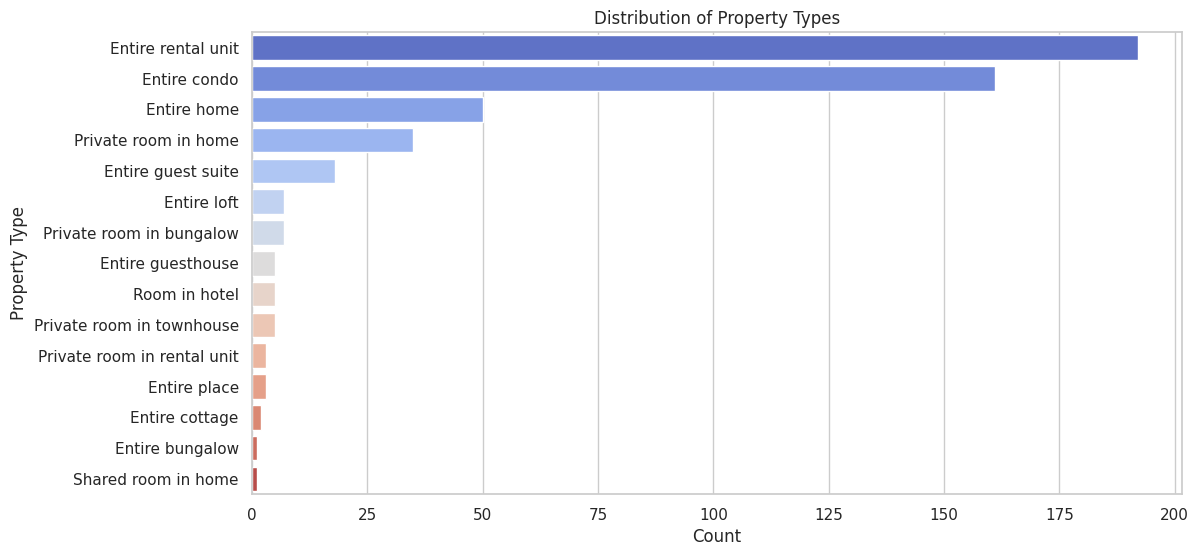

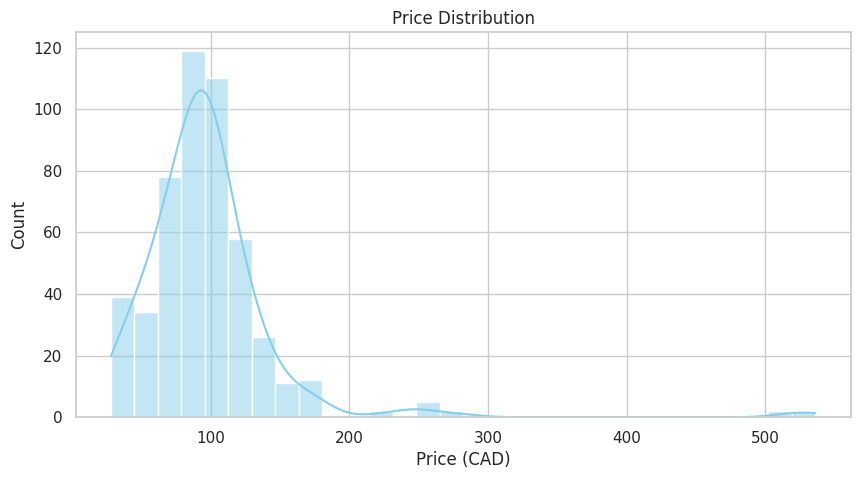

<ipython-input-4-7babbe34574f>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_avg_rating.values, y=df_avg_rating.index, palette='viridis')


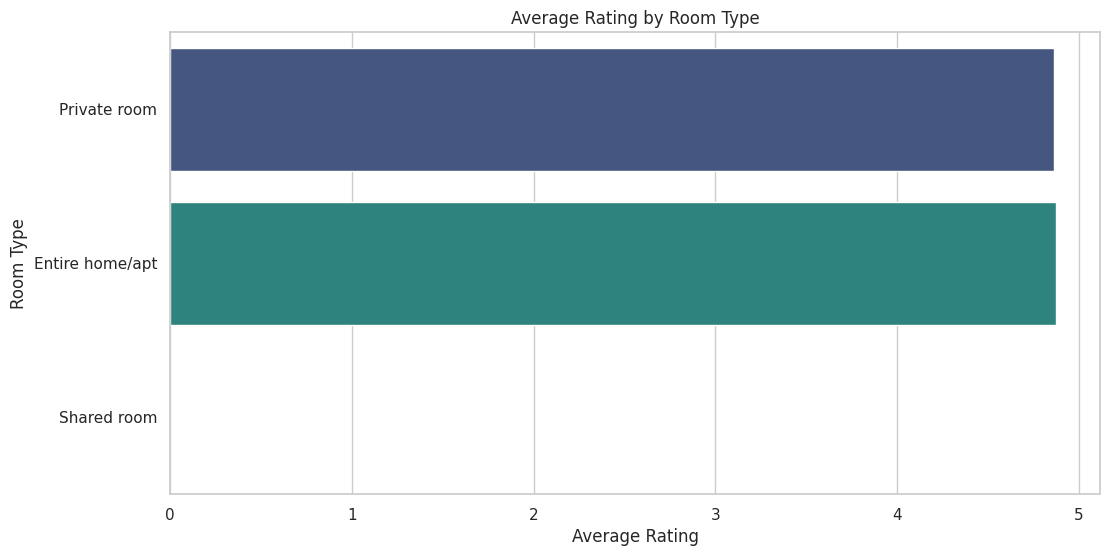

High-Demand Property Types: roomType
Entire home/apt    216
Private room        19
Name: count, dtype: int64
Recommended Property Types for New Hosts:
 propertyType
Private room in rental unit    5.000
Room in hotel                  5.000
Shared room in home            5.000
Entire guesthouse              4.992
Entire place                   4.980
Name: guestSatisfactionOverall, dtype: float64
Top Amenities:
 sections.amenities.title
What this place offers    4.879341
Name: guestSatisfactionOverall, dtype: float64


In [4]:
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_detailed = 'Detailed_Property.csv'
file_place = 'property_by_place.csv'
file_reviews = 'Property_Reviews.csv'

df_detailed = pd.read_csv(file_detailed)
df_place = pd.read_csv(file_place)
df_reviews = pd.read_csv(file_reviews)

df_place['price'] = df_place['price'].str.replace(r'[^\d.]', '', regex=True).astype(float)

df_reviews['review_date'] = pd.to_datetime(df_reviews['review_date'], errors='coerce')

threshold = 0.2
df_detailed = df_detailed.dropna(axis=1, thresh=int(threshold * len(df_detailed)))
df_place = df_place.dropna(axis=1, thresh=int(threshold * len(df_place)))
df_reviews = df_reviews.dropna(axis=1, thresh=int(threshold * len(df_reviews)))

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.countplot(y=df_detailed['propertyType'], order=df_detailed['propertyType'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df_place['price'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price (CAD)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
df_avg_rating = df_place.groupby('roomType')['avgRating'].mean().sort_values()
sns.barplot(x=df_avg_rating.values, y=df_avg_rating.index, palette='viridis')
plt.title('Average Rating by Room Type')
plt.xlabel('Average Rating')
plt.ylabel('Room Type')
plt.show()

demand_properties = df_place[(df_place['avgRating'] > 4.5) & (df_place['reviewsCount'] > 50)]
print('High-Demand Property Types:', demand_properties['roomType'].value_counts())


top_property_types = df_detailed.groupby('propertyType')['guestSatisfactionOverall'].mean().sort_values(ascending=False)
print('Recommended Property Types for New Hosts:\n', top_property_types.head(5))

top_amenities = df_detailed.groupby('sections.amenities.title')['guestSatisfactionOverall'].mean().sort_values(ascending=False)
print('Top Amenities:\n', top_amenities.head(10))

df_detailed.to_csv('Cleaned_Detailed_Property.csv', index=False)
df_place.to_csv('Cleaned_Property_by_Place.csv', index=False)
df_reviews.to_csv('Cleaned_Property_Reviews.csv', index=False)


In [7]:
# Load datasets
listings = pd.read_csv('/content/Detailed_Property.csv')
pricing = pd.read_csv('/content/Property_Reviews.csv')
reviews = pd.read_csv('/content/property_by_place.csv')

# Quick overview of data
print("Listings Data:")
display(listings.head(3))
display(listings.info())

print("\nPricing Data:")
display(pricing.head(3))

print("\nReviews Data:")
display(reviews.head(3))

Listings Data:


,title,propertyType,location,personCapacity,descriptionLanguage,listingLat,listingLng,homeTier,roomType,visibleReviewCount,...,sections.location.seeAllDetailsButton.accessibilityLabel,sections.location.seeAllDetailsButton.icon,sections.location.seeAllDetailsButton.title,sections.location.seeAllDetailsButton.subtitle,sections.sleepingArrangement.title,sections.sleepingArrangement.arrangementDetails,sections.title.actionableIcon.accessibilityLabel,sections.title.actionableIcon.icon,sections.title.actionableIcon.title,sections.title.actionableIcon.subtitle
0,Home in Calgary · ★4.95 · 1 bedroom · 1 bed · ...,Entire home,Calgary,2,en,51.055354,-114.028776,1,Entire home/apt,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rental unit in Calgary · ★4.84 · Studio · 2 be...,Entire rental unit,Calgary,3,en,51.052710,-114.047400,1,Entire home/apt,268.0,...,NaN,NaN,Show more,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Guest suite in Calgary · ★4.94 · 1 bedroom · 1...,Entire guest suite,Calgary,2,en,51.058770,-114.041540,1,Entire home/apt,69.0,...,NaN,NaN,Show more,NaN,Where you’ll sleep,"[{'title': 'Bedroom', 'subtitle': '1 queen bed...",NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Columns: 172 entries, title to sections.title.actionableIcon.subtitle
dtypes: bool(4), float64(89), int64(10), object(69)
memory usage: 651.8+ KB


None


Pricing Data:


,property_id,review_id,reviewer_name,reviewer_picture_url,reviewer_badges,review_date,rating,comments,disclaimer,localized_date,localized_review,language,reviewee_name
0,1143371712266502884,1342992886713445651,Rachel,https://a0.muscache.com/im/pictures/user/9abdf...,NaN,Haley,2025-01-26T23:27:07.000Z,4,"Super cute little place with a private, retrea...",January 2025,NaN,en,NaN
1,1143371712266502884,1341009568083458949,Meagan,https://a0.muscache.com/im/pictures/user/User-...,NaN,Haley,2025-01-24T05:46:37.000Z,5,Communication with the hosts were pleasant and...,January 2025,NaN,en,NaN
2,1143371712266502884,1337850133475839872,Meron,https://a0.muscache.com/im/pictures/user/User-...,NaN,Haley,2025-01-19T21:09:23.000Z,5,"Very clean, quiet and beautiful home. Very acc...",January 2025,NaN,en,NaN



Reviews Data:


,Unnamed: 0.1,Unnamed: 0,avgRating,listingBathroomLabel,bathrooms,listingBedLabel,bedrooms,beds,businessHostLabel,city,...,starRating,title,avgRatingLocalized,accessibilityLabel,price,qualifier,adults,children,infants,pets
0,0,0,4.95,1 bath,1.0,1 bed,1,1,NaN,Calgary,...,5.0,Home in Northeast Calgary,4.95 (20),$90 CAD per night,$90 CAD,night,1,0,0,0
1,1,1,4.84,1 bath,1.0,2 beds,0,2,NaN,Calgary,...,5.0,Apartment in Northeast Calgary,4.84 (268),$62 CAD per night,$62 CAD,night,1,0,0,0
2,2,2,4.94,1 bath,1.0,1 bed,1,1,NaN,Calgary,...,5.0,Guest suite in Northeast Calgary,4.94 (69),$90 CAD per night,$90 CAD,night,1,0,0,0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


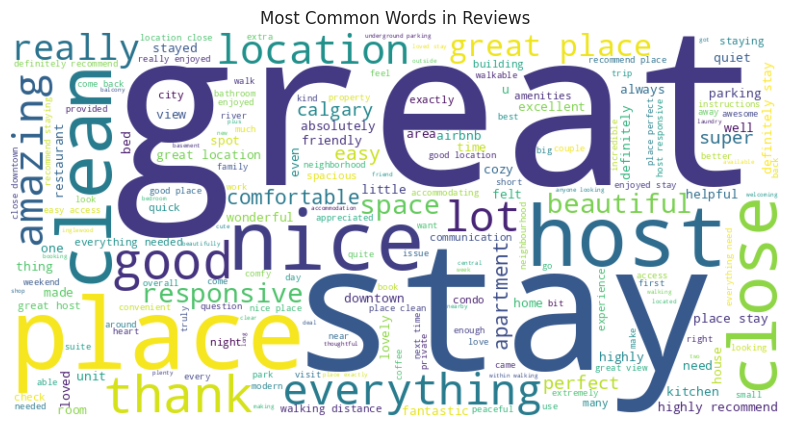

In [9]:
# Sentiment Analysis on Reviews
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = text.lower().split()
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return ' '.join(words)

df_reviews['cleaned_comments'] = df_reviews['disclaimer'].astype(str).apply(preprocess_text)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_reviews['cleaned_comments']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()

map_center = [df_detailed['listingLat'].mean(), df_detailed['listingLng'].mean()]
property_map = folium.Map(location=map_center, zoom_start=10)
for _, row in df_detailed.iterrows():
    folium.CircleMarker(
        location=[row['listingLat'], row['listingLng']],
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(property_map)
property_map

df_detailed.to_csv('Cleaned_Detailed_Property.csv', index=False)
df_place.to_csv('Cleaned_Property_by_Place.csv', index=False)
df_reviews.to_csv('Cleaned_Property_Reviews.csv', index=False)


In [13]:
# Selecting relevant features
features = ['bedrooms', 'bathrooms', 'beds', 'reviewsCount', 'starRating']
df_price_model = df_place.dropna(subset=['price'] + features)
X = df_price_model[features]
y = df_price_model['price']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R² Score:', r2_score(y_test, y_pred))

def suggest_price(bedrooms, bathrooms, beds, reviewsCount, starRating):
    input_data = pd.DataFrame([[bedrooms, bathrooms, beds, reviewsCount, starRating]], columns=X.columns)
    return model.predict(input_data)[0]

# Example usage
example_price = suggest_price(2, 1, 2, 50, 4.5)
print(f'Recommended Price for a 2-bed, 1-bath property with good reviews: ${example_price:.2f}')


Mean Absolute Error: 13.14153684400951
R² Score: 0.6055886052054725
Recommended Price for a 2-bed, 1-bath property with good reviews: $98.46


In [16]:
# Ensure 'rating' is numeric
df_reviews['rating'] = pd.to_numeric(df_reviews['rating'], errors='coerce')

df_reviews = df_reviews.dropna(subset=['rating'])

df_negative_reviews = df_reviews[df_reviews['rating'] <= 3]

!pip install nltk scikit-learn

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        words = text.lower().split()
        words = [word for word in words if word not in stop_words and word.isalpha()]
        return ' '.join(words)
    return ""

df_negative_reviews['cleaned_comments'] = df_negative_reviews['disclaimer'].astype(str).apply(preprocess_text)

df_negative_reviews = df_negative_reviews[df_negative_reviews['cleaned_comments'].str.strip() != ""]

if df_negative_reviews.empty:
    print("No valid words found after preprocessing. Try adjusting stopwords or input data.")
else:
    vectorizer = TfidfVectorizer(max_features=20)  # Extract top 20 words
    tfidf_matrix = vectorizer.fit_transform(df_negative_reviews['cleaned_comments'])
    feature_names = vectorizer.get_feature_names_out()

    # Display most frequent complaints
    print("Most Common Complaints from Negative Reviews:")
    print(feature_names)

    # Example suggestions based on keywords
    recommendations = {
        'clean': 'Improve cleaning services and ensure hygiene standards.',
        'wifi': 'Check Wi-Fi connection, upgrade router, or provide clear instructions.',
        'bed': 'Upgrade mattress, add extra pillows, or improve bedding quality.',
        'noise': 'Provide earplugs, install soundproofing, or mention noise levels in description.',
        'service': 'Improve customer service responsiveness and hospitality.',
    }

    print("\nHost Recommendations Based on Reviews:")
    for word in feature_names:
        if word in recommendations:
            print(f"- {word.capitalize()}: {recommendations[word]}")


No valid words found after preprocessing. Try adjusting stopwords or input data.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Check unique property IDs in both datasets
print(f"Unique property IDs in df_reviews: {df_reviews['property_id'].nunique()}")
print(f"Unique property IDs in df_place: {df_place['id'].nunique()}")

common_ids = set(df_reviews['property_id']).intersection(set(df_place['id']))
print(f"Matching property IDs between datasets: {len(common_ids)}")

# If no matches, inform the user
if len(common_ids) == 0:
    print("No matching property IDs found. Ensure both datasets use the same ID format.")
else:
    df_reviews['review_date'] = pd.to_datetime(df_reviews['review_date'], errors='coerce')
    missing_dates = df_reviews['review_date'].isna().sum()
    print(f"Missing review dates: {missing_dates}")

    df_reviews = df_reviews.dropna(subset=['review_date'])

    df_reviews['year_month'] = df_reviews['review_date'].dt.to_period('M')

    df_merged = df_reviews.merge(df_place, left_on='property_id', right_on='id', how='inner')

    if df_merged.empty:
        print("No valid data for seasonal pricing analysis after merging.")
    else:
        df_price_trends = df_merged.groupby('year_month')['price'].mean().dropna()

        import matplotlib.pyplot as plt

        plt.figure(figsize=(12, 6))
        df_price_trends.plot(marker='o', linestyle='-', color='b')
        plt.title('Seasonal Pricing Trends Over Time')
        plt.xlabel('Year-Month')
        plt.ylabel('Average Price (CAD)')
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()

        # Identify peak and off-season pricing
        peak_month = df_price_trends.idxmax()
        low_month = df_price_trends.idxmin()

        print(f"📈 Peak pricing month: {peak_month} with avg price of ${df_price_trends.max():.2f}")



Unique property IDs in df_reviews: 0
Unique property IDs in df_place: 245
Matching property IDs between datasets: 0
No matching property IDs found. Ensure both datasets use the same ID format.


In [23]:
print("Columns in df_reviews:", df_reviews.columns)

Columns in df_reviews: Index(['property_id', 'review_id', 'reviewer_name', 'reviewer_picture_url',
       'rating', 'comments', 'disclaimer', 'review_date', 'language',
       'cleaned_comments', 'year_month'],
      dtype='object')


In [24]:
# Check if property_id contains valid values
print("Unique property IDs:", df_reviews['property_id'].nunique())
print("First few values:\n", df_reviews['property_id'].head(10))


Unique property IDs: 0
First few values:
 Series([], Name: property_id, dtype: int64)


In [25]:
df_reviews = pd.read_csv("Property_Reviews.csv")
print("Dataset reloaded. Rows:", len(df_reviews))

Dataset reloaded. Rows: 2226


In [26]:
df_reviews = df_reviews.dropna(subset=['property_id'])
print("Rows after dropping NaN property_ids:", len(df_reviews))

Rows after dropping NaN property_ids: 2226


In [27]:
df_reviews['property_id'] = df_reviews['property_id'].astype(str)
df_place['id'] = df_place['id'].astype(str)

# Find matching property IDs again
common_ids = set(df_reviews['property_id']).intersection(set(df_place['id']))
print(f"Matching property IDs after conversion: {len(common_ids)}")


Matching property IDs after conversion: 228


In [30]:
#Check how many valid dates exist | year_month |....
print(f"Total rows in df_reviews: {len(df_reviews)}")
print(f"Valid review_date entries: {df_reviews['review_date'].notna().sum()}")
print(f"First few review dates:\n{df_reviews[['review_date']].dropna().head(10)}")

#  Check if  column was created correctly
if 'year_month' not in df_reviews.columns:
    print("year_month' column is missing.")
else:
    print(f"Unique year_month values: {df_reviews['year_month'].nunique()}")

print(f"Unique property IDs in df_reviews: {df_reviews['property_id'].nunique()}")
print(f"Unique property IDs in df_place: {df_place['id'].nunique()}")

df_reviews['property_id'] = df_reviews['property_id'].astype(str)
df_place['id'] = df_place['id'].astype(str)
matching_ids = set(df_reviews['property_id']).intersection(set(df_place['id']))
print(f"Matching property IDs: {len(matching_ids)}")

missing_prices = df_place['price'].isna().sum()
print(f"Missing prices in df_place: {missing_prices}")

print("Sample property_id values from df_reviews:\n", df_reviews['property_id'].dropna().unique()[:10])
print("Sample id values from df_place:\n", df_place['id'].dropna().unique()[:10])


Total rows in df_reviews: 0
Valid review_date entries: 0
First few review dates:
Empty DataFrame
Columns: [review_date]
Index: []
Unique year_month values: 0
Unique property IDs in df_reviews: 0
Unique property IDs in df_place: 245
Matching property IDs: 0
Missing prices in df_place: 0
Sample property_id values from df_reviews:
 []
Sample id values from df_place:
 ['1143371712266502884' '36314346' '671115779168748813'
 '742747938616966708' '1325634411764993748' '557341007928750082'
 '47195089' '873415992299458215' '1017444351066240000'
 '881954586936903353']


In [31]:
df_reviews = pd.read_csv("Property_Reviews.csv")
print("Dataset reloaded. Rows:", len(df_reviews))

print(df_reviews.head())

Dataset reloaded. Rows: 2226
           property_id            review_id reviewer_name  \
0  1143371712266502884  1342992886713445651        Rachel   
1  1143371712266502884  1341009568083458949        Meagan   
2  1143371712266502884  1337850133475839872         Meron   
3  1143371712266502884  1337179263690861473        Denise   
4  1143371712266502884  1334925649265449559        Maggie   

                                reviewer_picture_url  reviewer_badges  \
0  https://a0.muscache.com/im/pictures/user/9abdf...              NaN   
1  https://a0.muscache.com/im/pictures/user/User-...              NaN   
2  https://a0.muscache.com/im/pictures/user/User-...              NaN   
3  https://a0.muscache.com/im/pictures/user/6d395...              NaN   
4  https://a0.muscache.com/im/pictures/user/User/...              NaN   

  review_date                    rating  comments  \
0       Haley  2025-01-26T23:27:07.000Z         4   
1       Haley  2025-01-24T05:46:37.000Z         5   
2     

Rows after merging: 4499


<ipython-input-41-ba676bf26cd8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_merged["starRating"], y=df_merged["price"], palette="coolwarm")


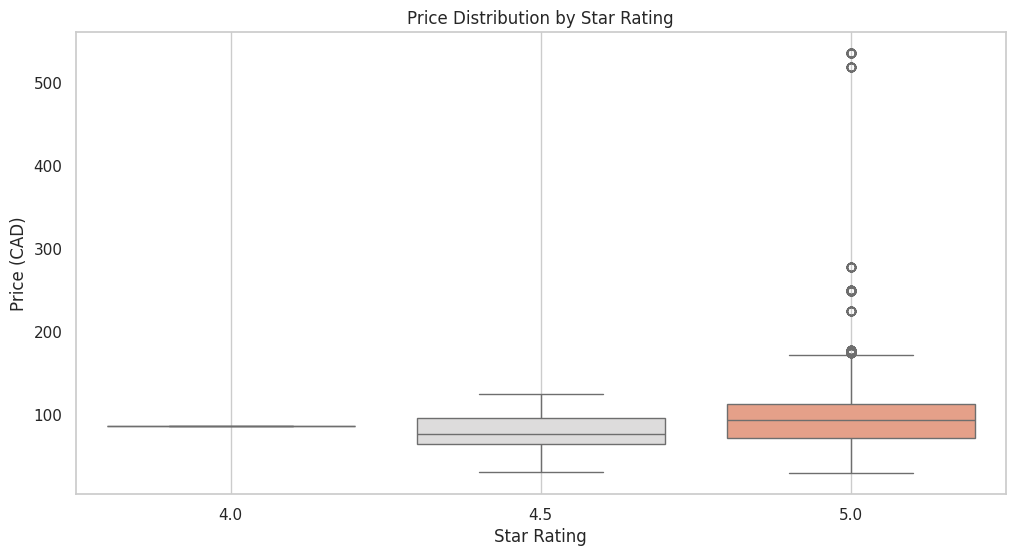

Average Price by Property Type:
 roomType
Shared room         28.000000
Private room        42.364679
Entire home/apt    106.832800
Name: price, dtype: float64


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

df_reviews['property_id'] = df_reviews['property_id'].astype(str)
df_place['id'] = df_place['id'].astype(str)

df_merged = df_reviews.merge(df_place, left_on="property_id", right_on="id", how="inner")

print(f"Rows after merging: {len(df_merged)}")

if not df_merged.empty:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df_merged["starRating"], y=df_merged["price"], palette="coolwarm")
    plt.title("Price Distribution by Star Rating")
    plt.xlabel("Star Rating")
    plt.ylabel("Price (CAD)")
    plt.grid()
    plt.show()

    avg_price_by_type = df_merged.groupby("roomType")["price"].mean().sort_values()
    print("Average Price by Property Type:\n", avg_price_by_type)
else:
    print("No matching data after merging. Check property_id values.")


           property_id         roomType  price  avg_price    std_dev  \
0  1143371712266502884  Entire home/apt   90.0   106.8328  62.115437   
1  1143371712266502884  Entire home/apt   90.0   106.8328  62.115437   
2  1143371712266502884  Entire home/apt   90.0   106.8328  62.115437   
3  1143371712266502884  Entire home/apt   90.0   106.8328  62.115437   
4  1143371712266502884  Entire home/apt   90.0   106.8328  62.115437   
5  1143371712266502884  Entire home/apt   90.0   106.8328  62.115437   
6  1143371712266502884  Entire home/apt   90.0   106.8328  62.115437   
7  1143371712266502884  Entire home/apt   90.0   106.8328  62.115437   
8  1143371712266502884  Entire home/apt   90.0   106.8328  62.115437   
9  1143371712266502884  Entire home/apt   90.0   106.8328  62.115437   

    price_status  
0  Fairly Priced  
1  Fairly Priced  
2  Fairly Priced  
3  Fairly Priced  
4  Fairly Priced  
5  Fairly Priced  
6  Fairly Priced  
7  Fairly Priced  
8  Fairly Priced  
9  Fairly Priced 

<ipython-input-42-c937f1f7c987>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_merged["price_status"], palette="coolwarm")


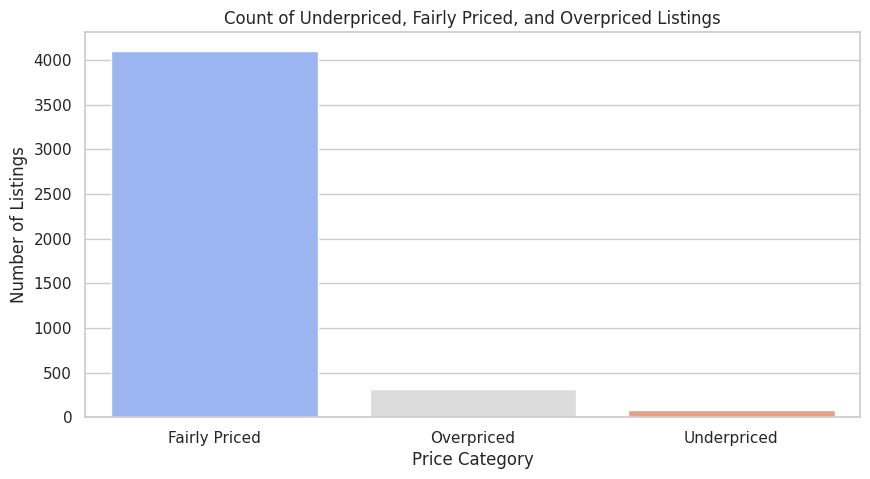

In [42]:
import numpy as np

price_stats = df_merged.groupby("roomType")["price"].agg(["mean", "std"]).rename(columns={"mean": "avg_price", "std": "std_dev"})

df_merged = df_merged.merge(price_stats, on="roomType", how="left")

df_merged["price_status"] = np.where(
    df_merged["price"] < df_merged["avg_price"] - df_merged["std_dev"], "Underpriced",
    np.where(df_merged["price"] > df_merged["avg_price"] + df_merged["std_dev"], "Overpriced", "Fairly Priced")
)

print(df_merged[["property_id", "roomType", "price", "avg_price", "std_dev", "price_status"]].head(10))

price_counts = df_merged["price_status"].value_counts()
print("\nPrice Category Distribution:\n", price_counts)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x=df_merged["price_status"], palette="coolwarm")
plt.title("Count of Underpriced, Fairly Priced, and Overpriced Listings")
plt.xlabel("Price Category")
plt.ylabel("Number of Listings")
plt.show()


In [43]:
# Define recommended prices for underpriced and overpriced listings
df_merged["recommended_price"] = np.where(
    df_merged["price_status"] == "Underpriced", df_merged["avg_price"],
    np.where(df_merged["price_status"] == "Overpriced", df_merged["avg_price"], df_merged["price"])
)

print(df_merged[["property_id", "roomType", "price", "price_status", "recommended_price"]].head(10))

adjustment_counts = df_merged["price_status"].value_counts()
print("\n📊 Price Adjustment Summary:\n", adjustment_counts)

df_merged.to_csv("Price_Recommendations.csv", index=False)
print("\n✅ Price recommendations saved as 'Price_Recommendations.csv'")


           property_id         roomType  price   price_status  \
0  1143371712266502884  Entire home/apt   90.0  Fairly Priced   
1  1143371712266502884  Entire home/apt   90.0  Fairly Priced   
2  1143371712266502884  Entire home/apt   90.0  Fairly Priced   
3  1143371712266502884  Entire home/apt   90.0  Fairly Priced   
4  1143371712266502884  Entire home/apt   90.0  Fairly Priced   
5  1143371712266502884  Entire home/apt   90.0  Fairly Priced   
6  1143371712266502884  Entire home/apt   90.0  Fairly Priced   
7  1143371712266502884  Entire home/apt   90.0  Fairly Priced   
8  1143371712266502884  Entire home/apt   90.0  Fairly Priced   
9  1143371712266502884  Entire home/apt   90.0  Fairly Priced   

   recommended_price  
0               90.0  
1               90.0  
2               90.0  
3               90.0  
4               90.0  
5               90.0  
6               90.0  
7               90.0  
8               90.0  
9               90.0  

📊 Price Adjustment Summary:
 p

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

features = ["bedrooms", "bathrooms", "beds", "starRating", "reviewsCount"]
df_price_model = df_merged.dropna(subset=["price"] + features)

X = df_price_model[features]
y = df_price_model["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
print("Model Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Define function to suggest an optimal price
def suggest_price(bedrooms, bathrooms, beds, starRating, reviewsCount):
    input_data = pd.DataFrame([[bedrooms, bathrooms, beds, starRating, reviewsCount]], columns=features)
    return model.predict(input_data)[0]

# Example prediction
example_price = suggest_price(2, 1, 2, 4.5, 50)
print(f"\n Suggested price for a 2-bed, 1-bath property with good reviews: ${example_price:.2f}")


Model Performance:
Mean Absolute Error: 2.9205488051555397
R² Score: 0.978522795400404

 Suggested price for a 2-bed, 1-bath property with good reviews: $89.36
